In [108]:
from scipy.stats import shapiro, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, chi2_contingency
from scipy.stats import pearsonr, spearmanr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 0.05

In [81]:
def print_test_results(stat, p, alpha=0.05):
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

def print_normality_test_results(data, alpha=0.05):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')


# Two-variable tests with toy data

In [53]:
A = [34, 23, 51, 47, 34]
B = [48, 27, 33, 45, 41, 35]
C = [34, 53, 54, 28, 52, 29]

print(np.mean(A), np.mean(B), np.mean(C))
print(np.std(A), np.std(B), np.std(C))

37.8 38.166666666666664 41.666666666666664
10.067770358922575 7.22072634081149 11.498792207106893


Statistics=0.933, p=0.619
Sample looks Gaussian (fail to reject H0)
Statistics=0.968, p=0.878
Sample looks Gaussian (fail to reject H0)
Statistics=0.791, p=0.048
Sample does not look Gaussian (reject H0)


<AxesSubplot: ylabel='Count'>

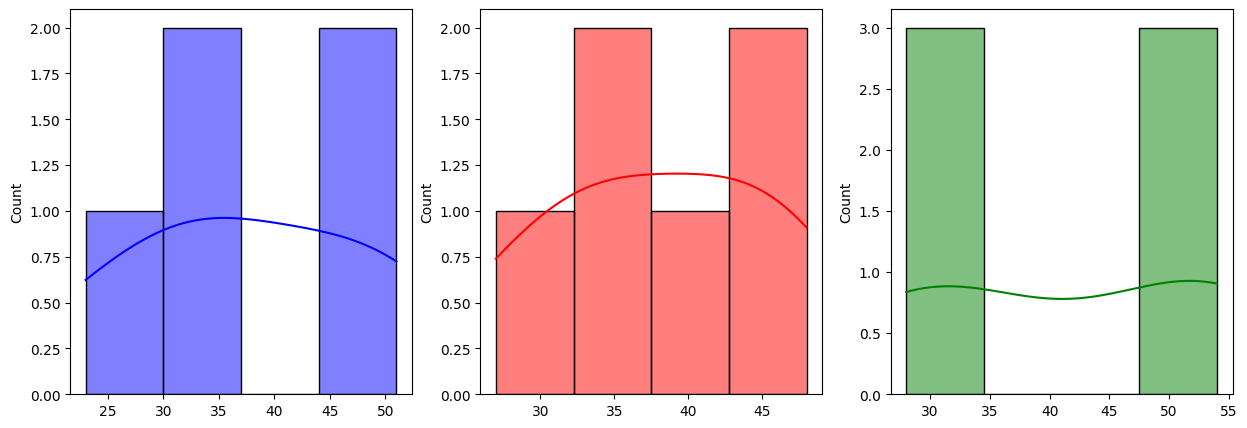

In [82]:
# Checking for normality
for sample in [A, B, C]:
    print_normality_test_results(sample)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(A, color='blue', kde=True)
plt.subplot(1, 3, 2)
sns.histplot(B, color='red', kde=True)
plt.subplot(1, 3, 3)
sns.histplot(C, color='green', kde=True)

In [56]:
# Since A and B have a normal distribution, we can use a t-test
# We cannot use a relative t-test since the samples are not paired (don't have the same length)
stat, p = ttest_ind(A, B)
print_test_results(stat, p)

Statistics=-0.063, p=0.951
Same distribution (fail to reject H0)


In [57]:
# Since A and C do not have a normal distribution, we can use a Mann-Whitney U test
stat, p = mannwhitneyu(A, C)
print_test_results(stat, p)

Statistics=11.000, p=0.519
Same distribution (fail to reject H0)


In [58]:
# Since B and C do not have a normal distribution, we can use a Mann-Whitney U test
stat, p = mannwhitneyu(B, C)
print_test_results(stat, p)

# Since B and C have the same length, we can use a relative t-test - migth be wrong since the samples are not paired and B does not have a normal distribution
stat, p = ttest_rel(B, C)
print_test_results(stat, p)

Statistics=14.000, p=0.589
Same distribution (fail to reject H0)
Statistics=-0.467, p=0.660
Same distribution (fail to reject H0)


# More two-variable tests

In [59]:
groupD = {
    "test" : [5.6, 3.1, 8.7, 4.5, 6.7, 4.5],
    "control" : [6.1, 5.8, 8.5, 5.3, 7.2, 5.1]
}

groupE = {
    "test" : [4.5, 3.9, 7.1, 4.3, 6.9, 8.2, 7.6],
    "control" : [4.9, 4.7, 7.8, 4.8, 7.5, 7.8, 8.1]
}

Statistics=0.957, p=0.800
Sample looks Gaussian (fail to reject H0)
Statistics=0.900, p=0.377
Sample looks Gaussian (fail to reject H0)
Statistics=0.865, p=0.167
Sample looks Gaussian (fail to reject H0)
Statistics=0.756, p=0.015
Sample does not look Gaussian (reject H0)


<AxesSubplot: ylabel='Count'>

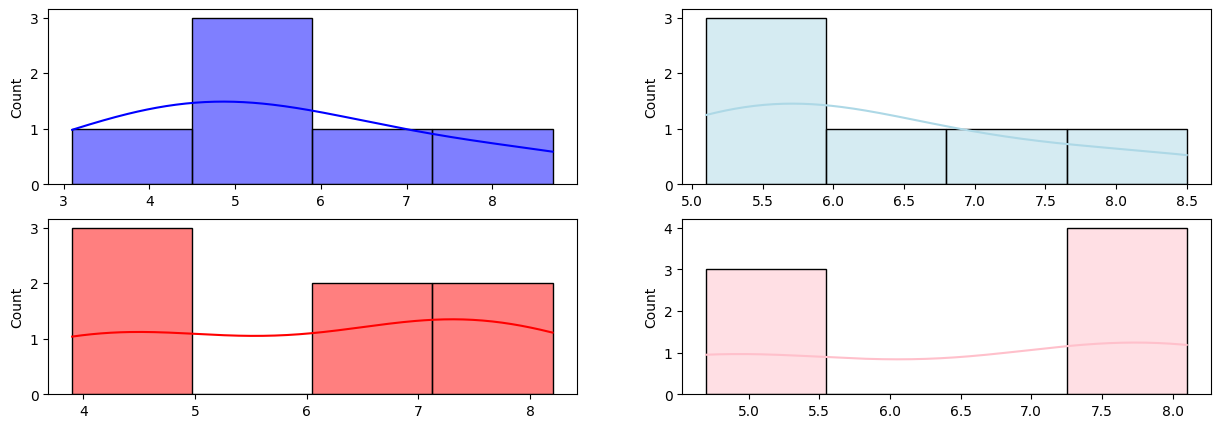

In [83]:
# Checking for normality
for sample in [groupD["test"], groupD["control"], groupE["test"], groupE["control"]]:
    print_normality_test_results(sample)

plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1)
sns.histplot(groupD["test"], color='blue', kde=True)
plt.subplot(2, 2, 2)
sns.histplot(groupD["control"], color='lightblue', kde=True)
plt.subplot(2, 2, 3)
sns.histplot(groupE["test"], color='red', kde=True)
plt.subplot(2, 2, 4)
sns.histplot(groupE["control"], color='pink', kde=True)

In [61]:
# Test and re-test of the same group
# Group D has a normal distribution, we can use a relative t-test
stat, p = ttest_rel(groupD["test"], groupD["control"])
print_test_results(stat, p)

# Test and re-test of the same group
# Group E does not have a normal distribution, we can use a Wilcoxon signed-rank test
stat, p = wilcoxon(groupE["test"], groupE["control"])
print_test_results(stat, p)

Statistics=-2.036, p=0.097
Same distribution (fail to reject H0)
Statistics=1.000, p=0.031
Different distribution (reject H0)


In [62]:
# Test between different groups
# Group D and Group E have a normal distribution when it comes to the test variable, we can use a t-test
stat, p = ttest_ind(groupD["test"], groupE["test"])
print_test_results(stat, p)

Statistics=-0.534, p=0.604
Same distribution (fail to reject H0)


In [63]:
# Control between different groups
# Group D has a normal distribution when it comes to control variable, but Group E does not, we can use a Mann-Whitney U test
stat, p = mannwhitneyu(groupD["control"], groupE["control"])
print_test_results(stat, p)

Statistics=22.000, p=0.943
Same distribution (fail to reject H0)


# More two-variable tests (continues)

In [64]:
groupE = {
    "test" : [4.5, 3.9, 7.1, 4.3, 6.9, 8.2, 7.6],
    "control" : [4.9, 4.7, 7.8, 4.8, 7.5, 7.8, 8.1]
}

In [68]:
corr, p_value = pearsonr(groupE["test"], groupE["control"])
print(f'Pearson correlation coefficient: {corr:.3f}, p-value: {p_value:.3f}')

corr, p_value = spearmanr(groupE["test"], groupE["control"])
print(f'Spearman correlation coefficient: {corr:.3f}, p-value: {p_value:.3f}')

# Conslusion: The test and control variables are correlated
# Strong linear positive correlation, meaning that the hypothesis that the test and control variables are not correlated can be rejected

Pearson correlation coefficient: 0.977, p-value: 0.000
Spearman correlation coefficient: 0.937, p-value: 0.002


# Advertisements

In [69]:
image = pd.read_csv('data/ads-image.csv')
video = pd.read_csv('data/ads-video.csv')

In [73]:
print(image.shape)
image.head()

(195, 2)


,person_id,amount_spent
0,87434,14.01
1,24844,10.46
2,23566,21.32
3,79972,121.10
4,37170,14.26


In [74]:
print(video.shape)
video.head()

(175, 2)


,person_id,amount_spent
0,5370,12.73
1,60667,25.42
2,96716,22.08
3,99764,0.52
4,75990,49.63


In [79]:
# Join based on person_id
columns = ['person_id', 'image', 'video']
data = pd.merge(image, video, on='person_id', how='inner')
data.columns = columns
print(data.shape)
data.head()

(171, 3)


,person_id,image,video
0,87434,14.01,40.54
1,24844,10.46,78.26
2,23566,21.32,5.66
3,79972,121.10,24.05
4,37170,14.26,48.67


47.17152046783626 43.72134502923977
40.340296216699365 42.428723815958016
Statistics=0.864, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.831, p=0.000
Sample does not look Gaussian (reject H0)


<AxesSubplot: xlabel='video', ylabel='Count'>

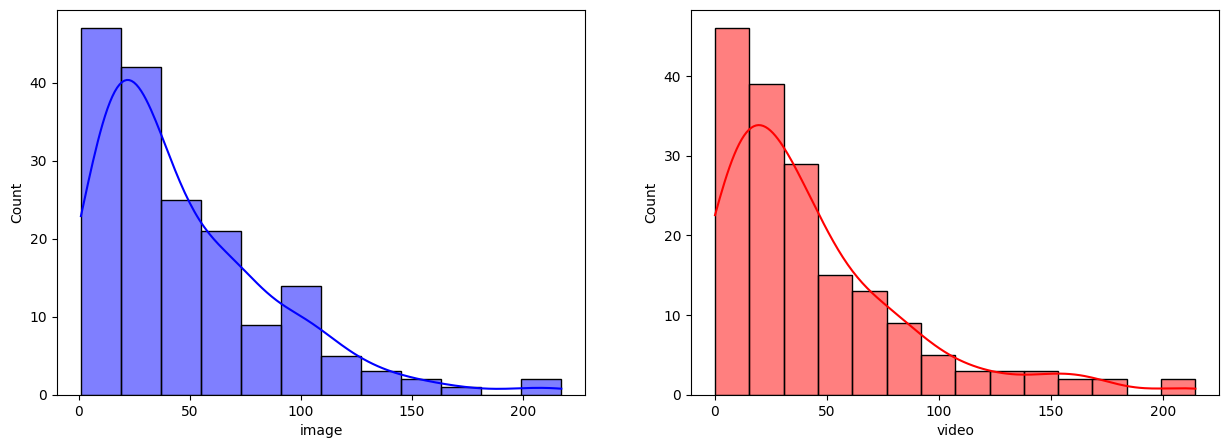

In [84]:
print(data['image'].mean(), data['video'].mean())
print(data['image'].std(), data['video'].std())

# Checking for normality
for sample in [data['image'], data['video']]:
    print_normality_test_results(sample)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['image'], color='blue', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(data['video'], color='red', kde=True)

In [86]:
# Since neither image nor video have a normal distribution, we can use a Mann-Whitney U test
stat, p = mannwhitneyu(data['image'], data['video'])
print_test_results(stat, p)

stat, p = wilcoxon(data['image'], data['video'])
print_test_results(stat, p)

# Because both p-values are above alpha = 0.05, we can conclude that the image and video ads have the same effect on the audience
# Or at least there is no evidence to reject the null hypothesis that the image and video ads have a DIFFERENT effect on the audience

Statistics=15809.500, p=0.194
Same distribution (fail to reject H0)
Statistics=6613.000, p=0.254
Same distribution (fail to reject H0)


# Electric bikes

In [87]:
bikes = pd.read_csv('data/bikes.data')
bikes.head()

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2


          duration
ticket            
season  589.444846
single  672.409938
          duration
ticket            
season  443.051107
single  662.620176
season
Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)
single
Statistics=0.738, p=0.000
Sample does not look Gaussian (reject H0)


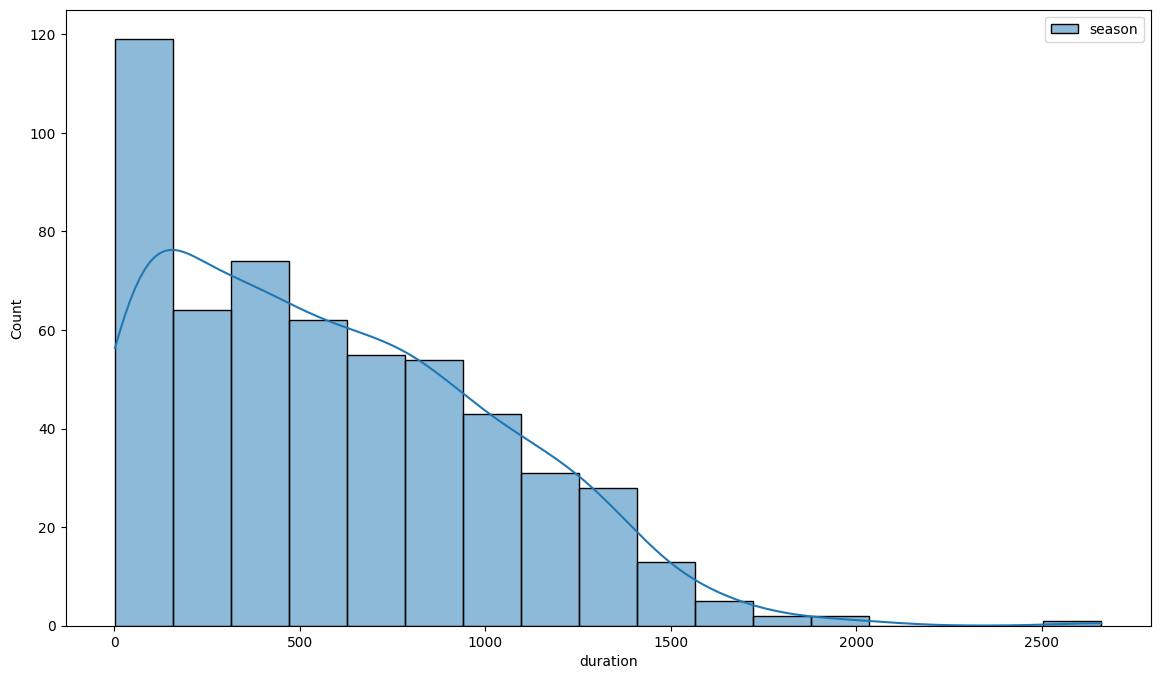

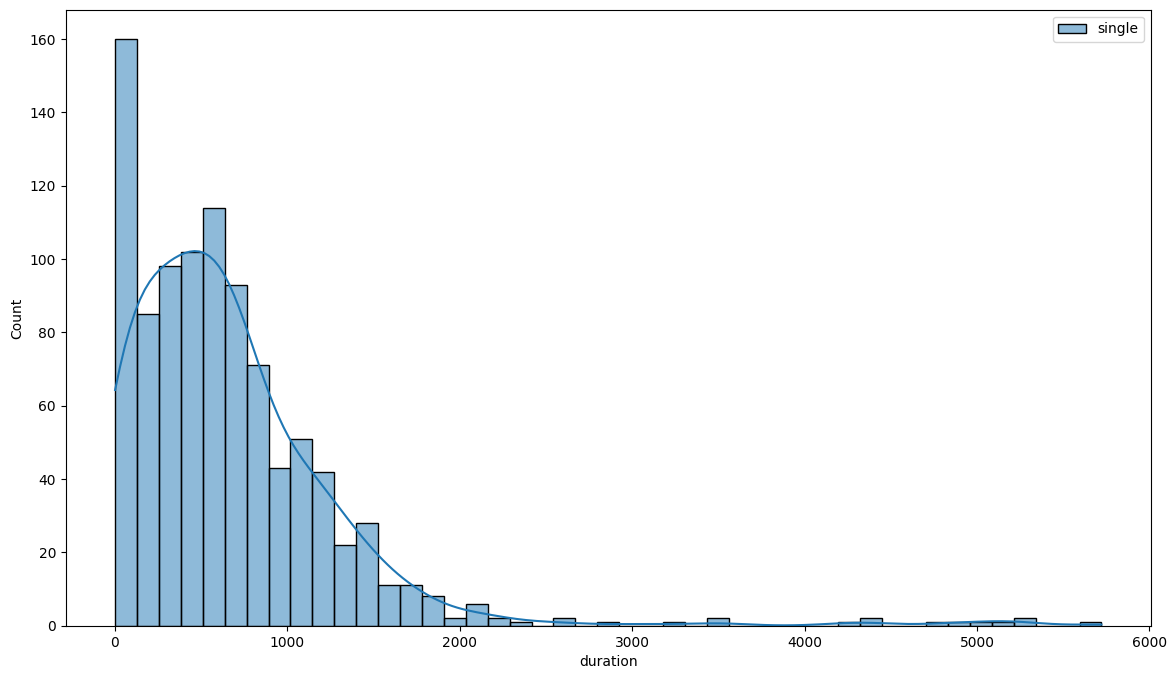

In [102]:
df = bikes[['ticket', 'duration']]
df = df[df['ticket'] != 'savonia']
df.dropna(inplace=True)
df = df[df['duration'] < 20000]
grouped = df.groupby('ticket')

print(grouped.mean())
print(grouped.std())

# Checking for normality
for name, group in grouped:
    print(name)
    print_normality_test_results(group['duration'])

for name, group in grouped:
    plt.figure(figsize=(14, 8))
    sns.histplot(group['duration'], kde=True, label=name)
    plt.legend()
    plt.show()

In [103]:
# Since the samples do not have a normal distribution, we can use a Mann-Whitney U test
stat, p = mannwhitneyu(grouped.get_group('single')['duration'], grouped.get_group('season')['duration'])
print_test_results(stat, p)

# Since the p-value is above alpha = 0.05, we can conclude that the durations of single and season tickets could be the same
# Or at least there is no evidence to reject the null hypothesis that the durations of single and season tickets tend to be shorter or longer than the other

Statistics=276356.000, p=0.260
Same distribution (fail to reject H0)


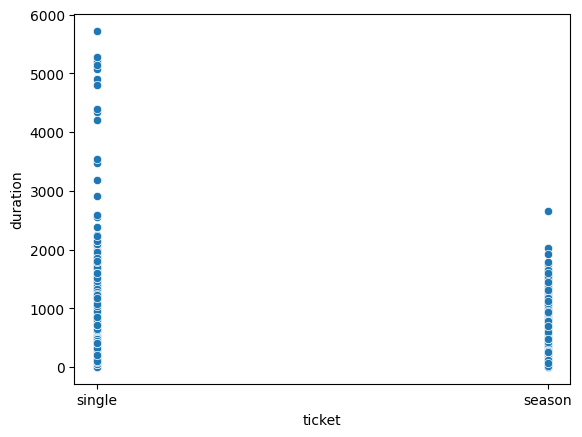

In [104]:
# Scatter plot of duration for single and season tickets
sns.scatterplot(data=df, x='ticket', y='duration')
plt.show()

C:\Users\masac\AppData\Local\Temp\ipykernel_4716\1192157437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


<AxesSubplot: xlabel='assistance', ylabel='count'>

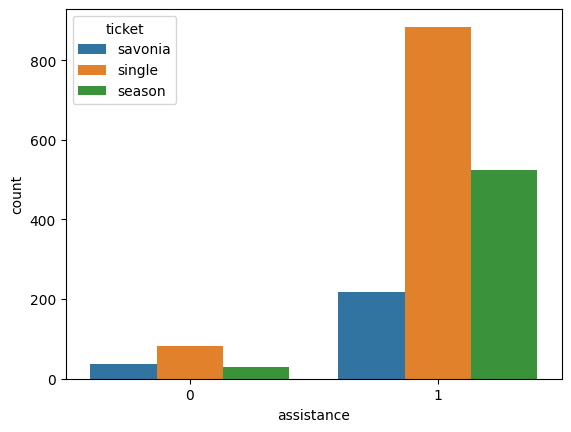

In [114]:
df = bikes[['ticket', 'assistance']]
df.dropna(inplace=True)
savonia_df = df[df['ticket'] == 'savonia']
others_df = df[df['ticket'] != 'savonia']

# Assistance is a categorical varibale with 0 and 1 as values
sns.countplot(data=df, x='assistance', hue='ticket')

In [120]:
# For testing two categorical variables, we can use a chi-squared test
# Statistical evidence that the savonia ticket type differes from the other ticket types in terms of assistance
contigency_table = pd.crosstab(df['ticket'] == 'savonia', df['assistance'])
stat, p, dof, expected = chi2_contingency(contigency_table)
print_test_results(stat, p)
if p < alpha:
    print("There is statistical evidence to suggest a difference in assistance usage between 'savonia' and other ticket types (reject H0).")
else:
    print("No statistical evidence to suggest a difference in assistance usage between 'savonia' and other ticket types (fail to reject H0).")

# Since p-value is below alpha = 0.05, we can conclude that the ticket type and assistance are dependent

Statistics=13.737, p=0.000
Different distribution (reject H0)
There is statistical evidence to suggest a difference in assistance usage between 'savonia' and other ticket types (reject H0).
